In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=8
paper='2008.08998'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let me analyze this Hamiltonian step by step to develop the Hartree-Fock implementation.

First, I need to identify the dimension and basis order.

### QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I see:
- A spin index $s$ in the operators $c_{\bm{q},s}^\dagger$ and $c_{\bm{q},s}$
- A crystal momentum $\bm{p}$ within the folded Brillouin zone
- A reciprocal lattice vector $\bm{q}$ which takes values at three high-symmetry points: $\Gamma$, $K$, and $K'$

So the flavors are:
1. Spin ($s$) which typically has two values: up and down
2. Reciprocal lattice vector ($\bm{q}$) which can take 3 values: $\Gamma$, $K$, and $K'$

The dimension tuple would be D = (2, 3), where 2 is the number of spin states and 3 is the number of reciprocal lattice vectors.

For the basis order, following the convention:
- Index 0: spin with values 'up' and 'down'
- Index 1: reciprocal lattice vectors with values '$\Gamma$', '$K$', and '$K'

In [7]:
print(generated_code['thinking'])

Let me analyze this Hamiltonian step by step to develop the Hartree-Fock implementation.

First, I need to identify the dimension and basis order.

### QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I see:
- A spin index $s$ in the operators $c_{\bm{q},s}^\dagger$ and $c_{\bm{q},s}$
- A crystal momentum $\bm{p}$ within the folded Brillouin zone
- A reciprocal lattice vector $\bm{q}$ which takes values at three high-symmetry points: $\Gamma$, $K$, and $K'$

So the flavors are:
1. Spin ($s$) which typically has two values: up and down
2. Reciprocal lattice vector ($\bm{q}$) which can take 3 values: $\Gamma$, $K$, and $K'$

The dimension tuple would be D = (2, 3), where 2 is the number of spin states and 3 is the number of reciprocal lattice vectors.

For the basis order, following the convention:
- Index 0: spin with values 'up' and 'down'
- Index 1: reciprocal lattice vectors with values '$\Gamma$', '$K$', and '$K'$'

### QUESTION 2: Identifying Interacting Terms

Le

In [8]:
print(generated_code['text'])

# ANSWER:

## 1) Number of Flavors, D = (2, 3)
Basis Order:
0: spin. Order: up, down
1: reciprocal lattice vector. Order: Gamma, K, K'

## 2) EXP-VAL DEPENDENT TERMS:
```
{
  "\langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\delta,s}(\bm{p}_\alpha) \rangle": "Expectation value for Hartree term - same spin, different q-vectors",
  "\langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\gamma,s'}(\bm{p}_\alpha) \rangle": "Expectation value for Fock term - different spin and q-vectors"
}
```

TERMS:
- $-\sum_{s}\sum_{\bm{p},\bm{q}}\sum_{R_\bm{n}} t_{s}(\bm{n}) e^{-i (\bm{p}+\bm{q}) \cdot R_\bm{n}} c_{\bm{p}+\bm{q},s}^\dagger c_{\bm{p},s}$ → H[s, q, s, q, k], NI (tight-binding)
- $\frac{1}{\mathcal{N}}\sum_{s,s'} \sum_{\bm{p},\bm{q}} U(\bm{q}_\alpha-\bm{q}_\delta)\delta_{\bm{q}_\alpha+\bm{q}_\beta,\bm{q}_\gamma+\bm{q}_\delta} \langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\delta,s}(\bm{p}_\alpha) \rangle c_{\bm{q}_\beta,s'}^\dagger(\bm{p}_\beta) c_{\bm{q}_

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice with folded Brillouin zone.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor, default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2, 3)  # (spin, q-vector)
        self.basis_order = {
            '0': 'spin',           # up, down
            '1': 'q-vector'        # Gamma, K, K'
        }
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0.0)  # temperature, default to 0
        self.a = parameters.get('a', 1.0)  # Lattice constant
        self.primitive_vectors = get_primitive_vectors_triangle(self.a)

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2008_08998_8.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

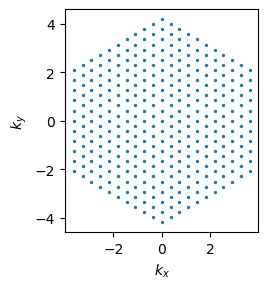

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

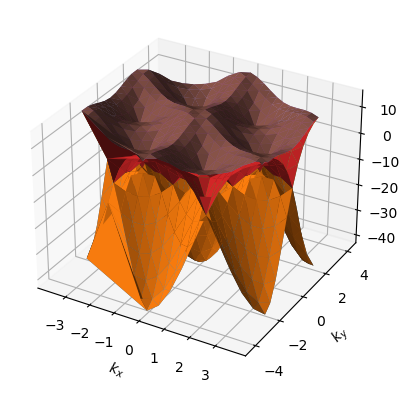

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

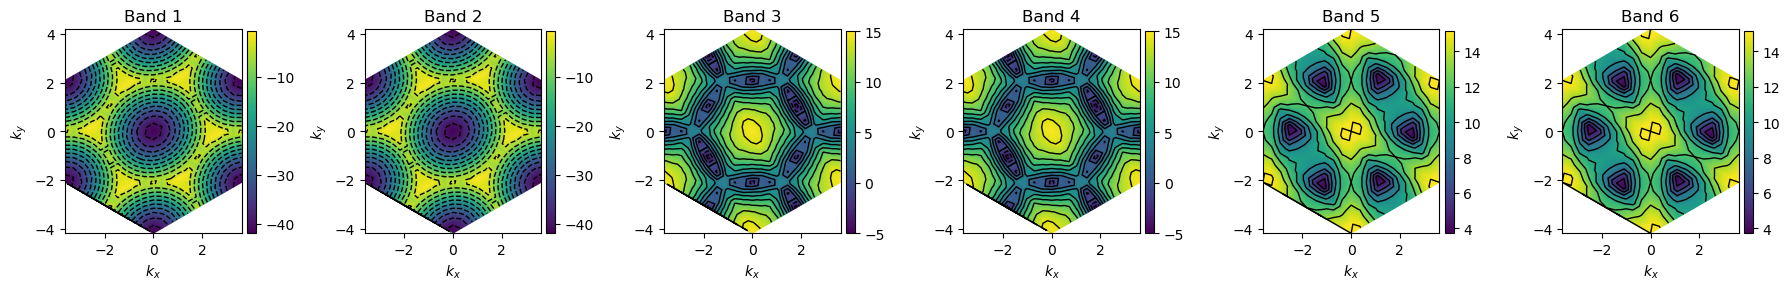

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e5},filling_factor=1/2)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,99)

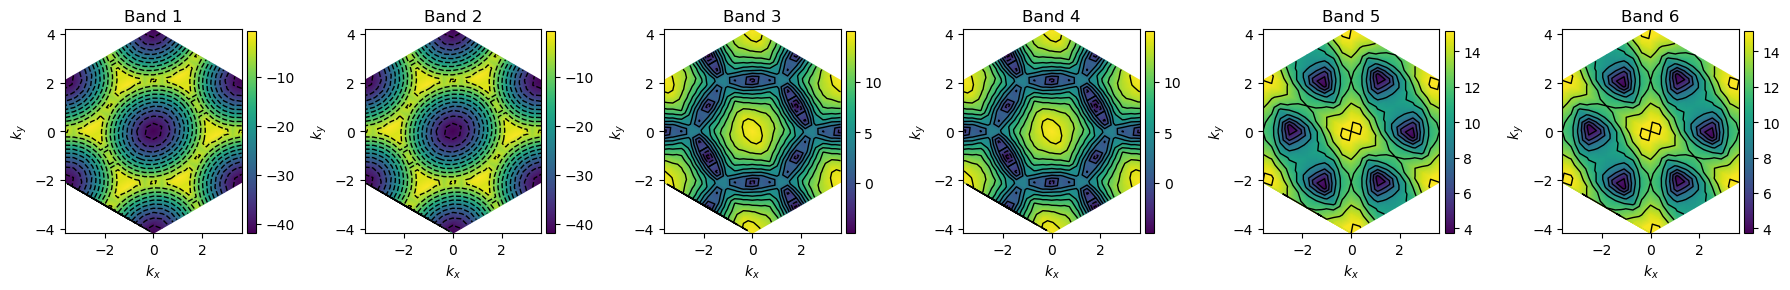

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e-2},filling_factor=1/2)


In [28]:
h_nonint=ham_int.generate_non_interacting()
for q in range(3):
    h_nonint[0,q,0,q,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

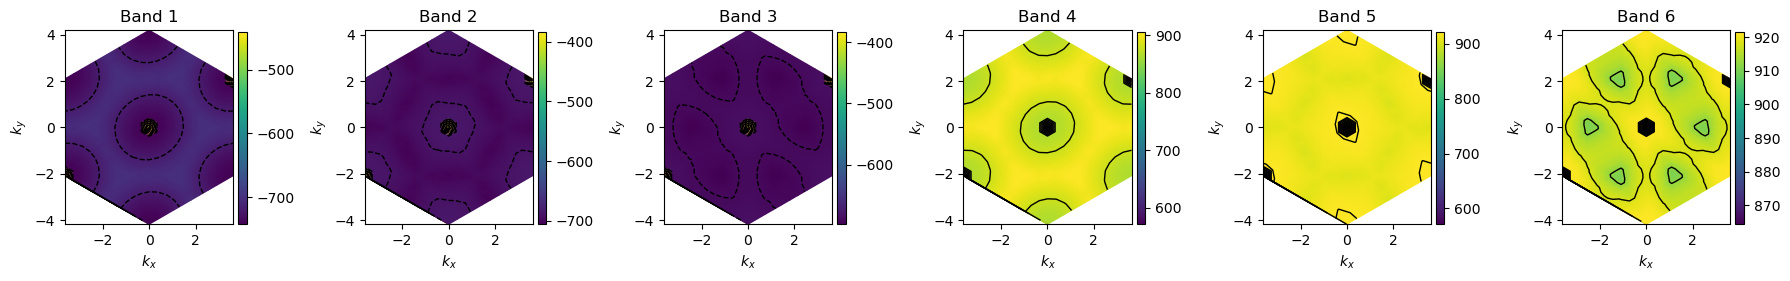

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is -313.40
U/T is 63.00
mean_U is 132.99


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image and check it against the rubric:

1. The image shows a momentum space mesh in what appears to be a hexagonal Brillouin zone, which is consistent with a triangular lattice in real space. The hexagonal shape is characteristic of the first Brillouin zone of a triangular lattice.

2. The axes are labeled as kx and ky, which are standard for momentum space representation.

3. The mesh consists of regularly spaced points (blue dots) arranged in a hexagonal pattern.

4. From the problem description, we need to check whether this momentum space mesh corresponds to the folded Brillouin zone as described in the problem. The problem mentions that the crystal momentum p is defined within the folded Brillouin zone of the triangular lattice, where the folded BZ has a reciprocal lattice vector length that is 1/sqrt(3) of the original, and is rotated by 90 degrees.

Let's analyze the point group symmetry of the mesh in the i

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the band structure plots shown in the image according to the rubric.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the plots, I can see that each band is displayed within a hexagonal boundary. This hexagonal shape is indeed the expected Brillouin zone boundary for a triangular lattice, as the first Brillouin zone of a triangular lattice is a regular hexagon. So this part is correct.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
In Bands 1 and 2, the highest energy regions (yellow) appear at six points near the corners of the hexagon.
In Bands 3 and 4, the highest energy regions are at the center and in a hexagonal pattern around it.
In Bands 5 and 6, the highest energy regions appear to form an intricate pattern with local maxima at spe

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let me evaluate the band structure plots shown in the image based on the rubric provided.

1. **Shape of the Brillouin zone boundary**: 
The plots show a hexagonal Brillouin zone boundary, which is correct for a triangular lattice. The hexagonal shape is visible in all six band plots. This matches what is expected for a triangular lattice.

2. **Symmetry of the energy distribution**:
   
   2.1 **Highest energy regions (yellow)**: 
   - In Bands 1-2: Yellow regions appear at the corners of the hexagon (K points)
   - In Bands 3-4: Yellow regions appear both in the center (Γ point) and in certain regions around the boundary
   - In Bands 5-6: Yellow regions appear primarily at the center and in patterns throughout the zone

   2.2 **Pattern of energy variation**: 
   - Bands 1-2 show similar patterns with the lowest energies (dark blue) at the center and highest at corners
   - Bands 3-4 show more complex patterns with energy maxima a

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='U/epsilon_r=1000/1e-2=100000',nu=1/2)
    )


#################### THINKING ####################

Let me analyze this image showing band structures in the first Brillouin zone calculated using self-consistent Hartree-Fock method for a triangular lattice. I'll follow the rubric carefully:

1. Identify the shape of the Brillouin zone boundary:
- Looking at the plots, I can see that each panel shows a hexagonal boundary, which is indeed the expected Brillouin zone shape for a triangular lattice. This is correct.

2. Examine the symmetry of the energy distribution:

2.1 Highest energy regions (yellow):
- In bands 4, 5, and 6, I can see the yellow regions indicating highest energy.
- In bands 1, 2, and 3, the color scale is inverted (with purple being the lowest energy), showing different energy ranges.

2.2 Pattern of energy variation:
- Bands 1-3: Show dark purple centers with some circular/hexagonal contours.
- Bands 4-6: Show yellow backgrounds with various patterns of local extrema.

2.3 Rotational and mirror symmetries:
- I noti

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '8' saved to final_answer.yaml
